# Statistical Inference for Proportions Lab:

## Customer Retention Analysis at DataFlow

You've recently joined DataFlow, a Software-as-a-Service (SaaS) company that provides data visualization tools. The customer success team has been piloting a new onboarding program to improve customer retention. Your task is to analyze whether the new program shows statistically significant improvement over the traditional approach.

Your task is to:
- Estimate the retention rate for customers who went through the traditional onboarding
- Estimate the retention rate for customers who went through the new onboarding
- Determine if the new onboarding program shows statistically significant improvement


## Data Overview
Here's what we know about our onboarding programs:

- Traditional Onboarding: 180 retained customers out of 240 participants
- New Onboarding: 210 retained customers out of 260 participants
- A customer is considered "retained" if they remain subscribed after 3 months

First, let's import the libraries we'll need for our analysis:

In [1]:
# CodeGrade step0
# Run this cell without changes
# Import required libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Step 1: Setup

Given the known values above let's store those as variables to use in our statisitcal calculations and functions.

In [2]:
# CodeGrade step1
# Traditional onboarding data
traditional_retained = 180
traditional_total = 240

# New onboarding data
new_retained = 210
new_total = 260

# Calculate basic retention rates
traditional_rate = traditional_retained / traditional_total
new_rate = new_retained / new_total

In [3]:
# Run this cell without changes to display rates
print(f"Traditional retention rate: {traditional_rate:.2%}")
print(f"New retention rate: {new_rate:.2%}")

Traditional retention rate: 75.00%
New retention rate: 80.77%


### Step 2: Confidence Interval Traditional

In this section, we'll calculate the 95% confidence interval for the traditional onboarding retention rate. This will help us understand the range of plausible values for the true retention rate. Remember you can use `np.sqrt()` for square roots.

In [4]:
# CodeGrade step2

# Calculate the standard error
traditional_std_error = np.sqrt((traditional_rate * (1 - traditional_rate)) / traditional_total)

# Calculate the margin of error (using z=1.96 for 95% confidence)
traditional_margin_of_error = 1.96 * traditional_std_error

#Calculate the confidence interval bounds
traditional_ci_lower = traditional_rate - traditional_margin_of_error
traditional_ci_upper = traditional_rate + traditional_margin_of_error

In [5]:
# Run this code without changes to display CI
print(f"95% Confidence Interval for traditional retention rate: ({traditional_ci_lower:.2%}, {traditional_ci_upper:.2%})")

95% Confidence Interval for traditional retention rate: (69.52%, 80.48%)


### Step 3: Confidence Interval New

In this section, we'll calculate the 95% confidence interval for the new onboarding retention rate. By comparing to the traditional approach CI, we can get a primlinary idea for if there is a difference.

In [6]:
# CodeGrade step3
# Calculate the standard error
new_std_error = np.sqrt((new_rate * (1 - new_rate)) / new_total)

# Calculate the margin of error (using z=1.96 for 95% confidence)
new_margin_of_error = 1.96 * new_std_error

#Calculate the confidence interval bounds
new_ci_lower = new_rate - new_margin_of_error
new_ci_upper = new_rate + new_margin_of_error

In [7]:
# Run this code without changes to display CI
print(f"95% Confidence Interval for new retention rate: ({new_ci_lower:.2%}, {new_ci_upper:.2%})")

95% Confidence Interval for new retention rate: (75.98%, 85.56%)


### Step 4: Quick Comparison

Compare both of the confidence intervals for the traditional and new onboarding approach. Based on the visual of the intervals below would you expect to see a significant difference? Assign either `True` or `False` to the variable below.

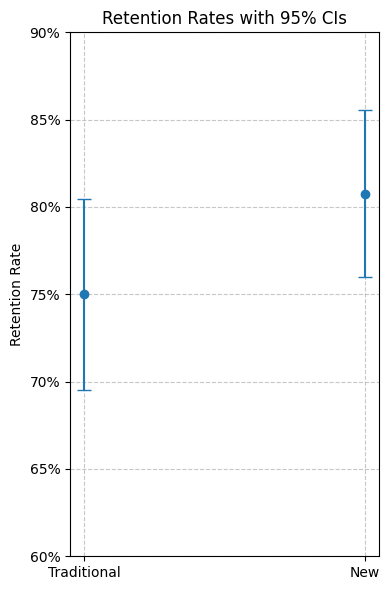

In [8]:
# Run this cell without changes to show visual comparison
# Create plot with grid
plt.figure(figsize=(4, 6))
# Add grid before plotting data (so data appears on top)
plt.grid(True, linestyle='--', alpha=0.7)
# Plot error bars for both programs
programs = ['Traditional', 'New']
rates = [traditional_rate, new_rate]
errors = [traditional_margin_of_error, new_margin_of_error]
plt.errorbar(programs, rates, yerr=errors, fmt='o', capsize=5)
plt.ylabel('Retention Rate')
plt.title('Retention Rates with 95% CIs')
# Format y-axis as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Focus y-axis on relevant range
plt.ylim(0.6, 0.9)
# Reduce margins
plt.tight_layout()
plt.show()

In [9]:
# CodeGrade step4
sig_diff_exp = False

### Step 5: Hypothesis Testing
Now we'll determine if there's a statistically significant difference between the two onboarding approaches using a two-proportion z-test.

Our hypotheses are:

- H₀ (Null Hypothesis): There is no difference in retention rates between the traditional and new onboarding programs
- H₁ (Alternative Hypothesis): There is a difference in retention rates between the programs

Statsmodels documentation for one and two sample proportion [z-test](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html)

In [11]:
# CodeGrade step5
# Import test function from statsmodels
from statsmodels.stats.proportion import proportions_ztest

# Traditional Onboarding: 180 retained customers out of 240 participants
# New Onboarding: 210 retained customers out of 260 participants

# Setup Data as numpy arrays
counts = np.array([180, 210])
nobs = np.array([240, 260])

# Implement the test
stat, pvalue = proportions_ztest(counts, nobs)

In [12]:
# Run this cell without changes to display results
print(f"\nZ-statistic: {stat:.4f}")
print(f"P-value: {pvalue:.4f}")


Z-statistic: -1.5558
P-value: 0.1197


### Step 6: Business Impact Analysis
Now let's analyze what these results mean for the business. We'll calculate some key metrics that would be meaningful to stakeholders.

In [13]:
# CodeGrade step6
# Calculate the absolute difference in retention rates
retention_rate_difference = np.abs(new_rate - traditional_rate)

# Calculate how many additional customers we would retain per 1000 customers
additional_retained_per_1000 = retention_rate_difference * 1000

# If each customer generates $100 monthly revenue, calculate the monthly revenue impact per 1000 customers
monthly_revenue_per_customer = 100  # dollars
monthly_revenue_impact_per_1000 = additional_retained_per_1000 * monthly_revenue_per_customer

In [14]:
# Run this cell without changes to display results
print(f"Absolute improvement in retention: {retention_rate_difference:.2%}")
print(f"Additional customers retained per 1000: {additional_retained_per_1000:.0f}")
print(f"Monthly revenue impact per 1000 customers: ${monthly_revenue_impact_per_1000:,.2f}")

Absolute improvement in retention: 5.77%
Additional customers retained per 1000: 58
Monthly revenue impact per 1000 customers: $5,769.23
